Adult DataSet Description:

Abstract : Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

Attribute Information:
1. age: continuous.
2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. fnlwgt: continuous.
4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5. education-num: continuous.
6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10. sex: Female, Male.
11. capital-gain: continuous.
12. capital-loss: continuous.
13. hours-per-week: continuous.
14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
15. income: >50K, <=50K.

In [48]:
# see the value of multiple statements at once
# output for all commands in python jupyter notebook

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# to suppress the warnings

import warnings
warnings.filterwarnings('ignore')

In [49]:
# importing the packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import math
import time
import itertools as it


# This magic command line tells the notebook to show plots inline
%matplotlib inline

# Set a style/theme to the plots
sns.set_style(style='darkgrid')
plt.style.use('ggplot')

In [50]:
adult_df = pd.read_csv('adult.csv')

In [51]:
adult_df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [52]:
adult_df.shape

(48842, 15)

In [53]:
len(adult_df)

48842

# checking for the null values

In [54]:
for i in adult_df.columns:
    print('column name:',i)
    print(adult_df[i].value_counts())
    print('**********************************')

column name: age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64
**********************************
column name: workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
**********************************
column name: fnlwgt
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
131379     1
160061     1
334224     1
45381      1
208174     1
Name: fnlwgt, Length: 28523, dtype: int64
**********************************
column name: education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-sch

In [55]:
# to interpolate the missing values  
#dataset.interpolate(method ='linear', limit_direction ='forward')


adult_df.fillna(axis=0, method='ffill', inplace=True)

In [56]:
adult_df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [57]:
adult_df.isnull().head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [58]:
adult_df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [59]:
#Summary statistics

adult_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [60]:
# Check for '?' in dataset
round((adult_df.isin(['?']).sum() / adult_df.shape[0])
      * 100, 2).astype(str) + ' %'

age                 0.0 %
workclass          5.73 %
fnlwgt              0.0 %
education           0.0 %
educational-num     0.0 %
marital-status      0.0 %
occupation         5.75 %
relationship        0.0 %
race                0.0 %
gender              0.0 %
capital-gain        0.0 %
capital-loss        0.0 %
hours-per-week      0.0 %
native-country     1.75 %
income              0.0 %
dtype: object

In [61]:
# Checking the counts of label categories

income = adult_df['income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

<=50K    76.07 %
>50K     23.93 %
Name: income, dtype: object

# Exploratory Data Analysis


Univariate Analysis

<Figure size 504x360 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Income')

Text(0.5, 0, 'Income')

Text(0, 0.5, 'Number of people')

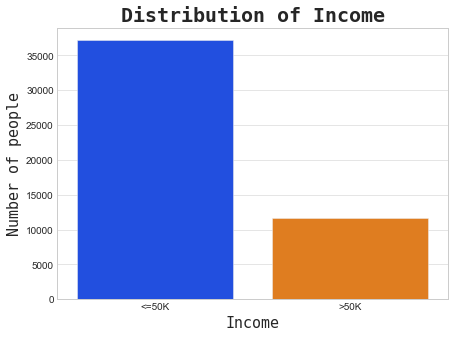

In [62]:
# Creating a barplot for 'Income'
income = adult_df['income'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(income.index, income.values, palette='bright')
plt.title('Distribution of Income', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Age')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Number of people')

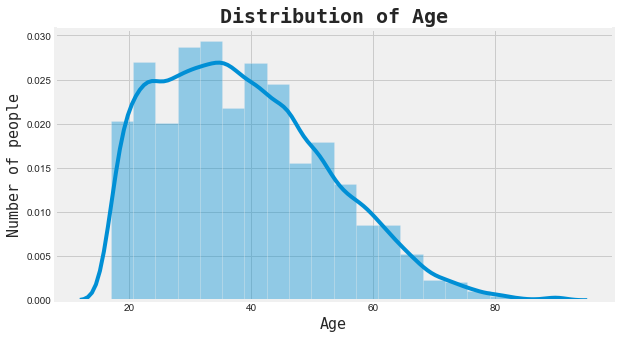

In [63]:
# Creating a distribution plot for 'Age'
age = adult_df['age'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(adult_df['age'], bins=20)
plt.title('Distribution of Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Education')

Text(0.5, 0, 'Number of people')

Text(0, 0.5, 'Education')

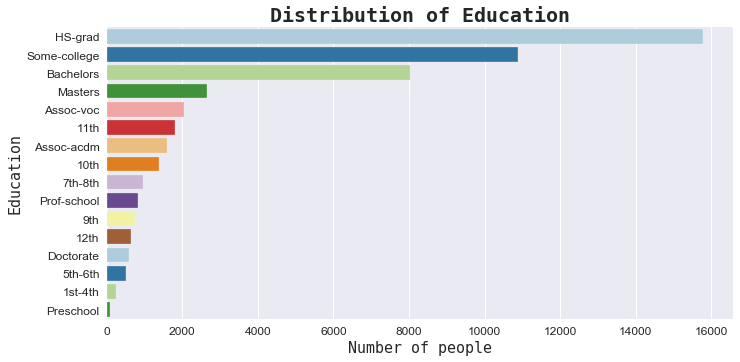

In [64]:
# Creating a barplot for 'Education'
edu = adult_df['education'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(edu.values, edu.index, palette='Paired')
plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

<Figure size 1000x700 with 0 Axes>

([<matplotlib.patches.Wedge at 0x1b6a5c65248>,
 [Text(-0.04749241568816841, 1.0989742810694445, 'Married-civ-spouse'),
  Text(-0.7577584792314732, -1.0563153350930796, 'Never-married'),
  Text(0.8198652747781402, -0.7333627555398249, 'Divorced'),
  Text(1.077032686993802, -0.22360811959074992, 'Separated'),
  Text(1.0999588024740596, -0.009520129192024038, 'Widowed'),
  Text(1.0908063898658, 0.141920470080748, 'Married-spouse-absent'),
  Text(1.0837400419923615, 0.1884343954335166, 'Married-AF-spouse')],
 [Text(-0.02590495401172822, 0.5994405169469696, '45.8%'),
  Text(-0.4663129102962912, -0.6500402062111259, '33.0%'),
  Text(0.44719924078807644, -0.4000160484762681, '13.6%'),
  Text(0.5874723747238919, -0.12196806523131812, '3.1%'),
  Text(0.5999775286222143, -0.00519279774110402, '3.1%'),
  Text(0.5949853035631636, 0.07741116549858983, '1.3%'),
  Text(0.5911309319958334, 0.10278239750919087, '0.1%')])

Text(0.5, 1.0, 'Marital distribution')

(-1.234403163303356,
 1.1066560675691024,
 -1.2843734205761894,
 1.1187697769569493)

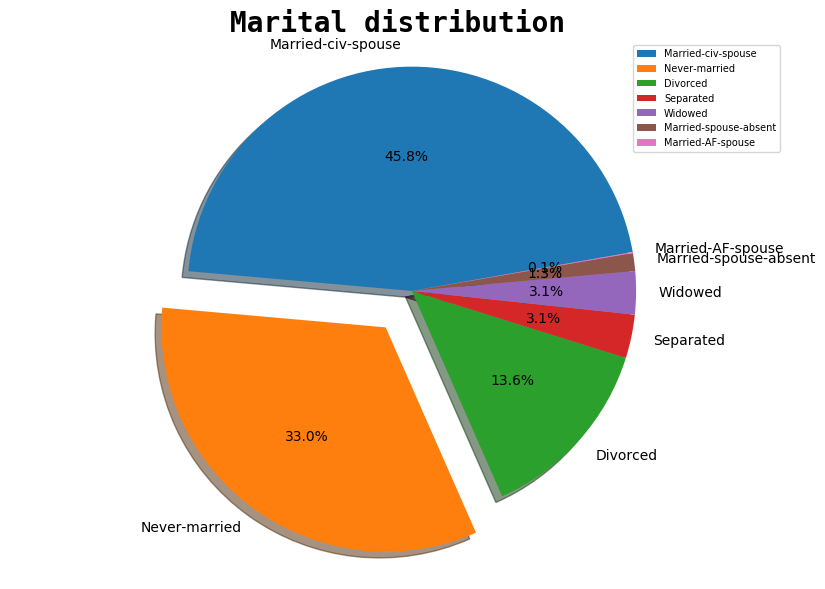

In [65]:
# Creating a pie chart for 'Marital status'
marital = adult_df['marital-status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

<Figure size 1500x700 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Hours of work per week')

Text(0.5, 0, 'Hours of work')

Text(0, 0.5, 'Number of people')

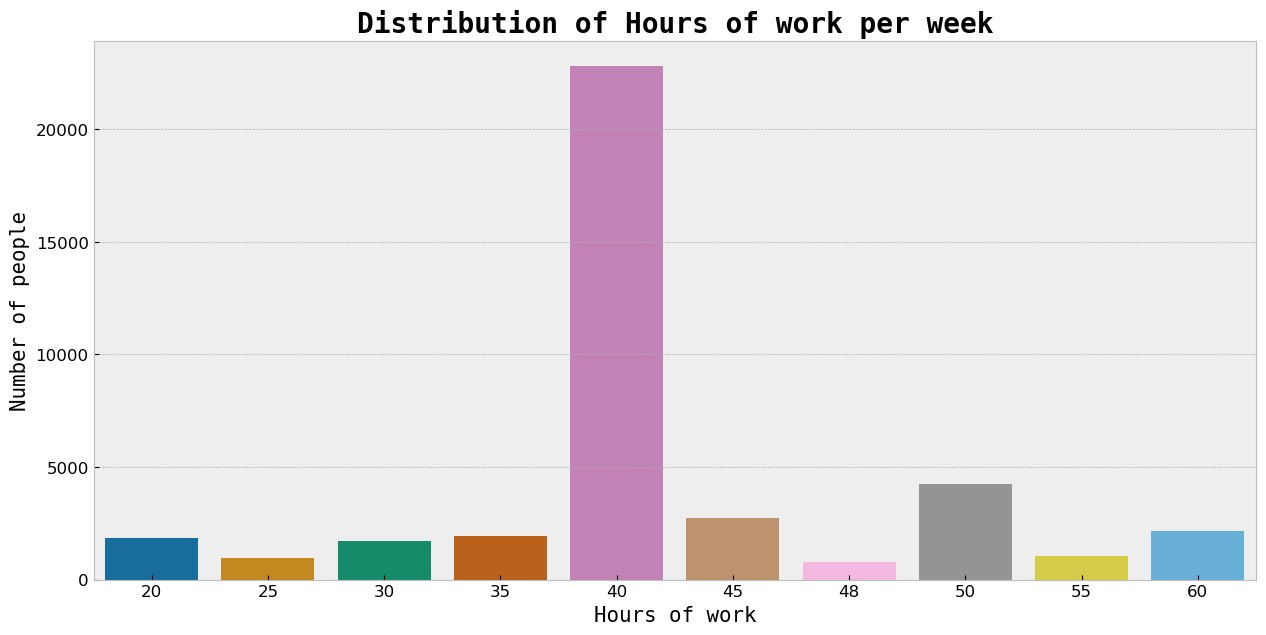

In [66]:
# Creating a barplot for 'Hours per week'
hours = adult_df['hours-per-week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(hours.index, hours.values, palette='colorblind')
plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

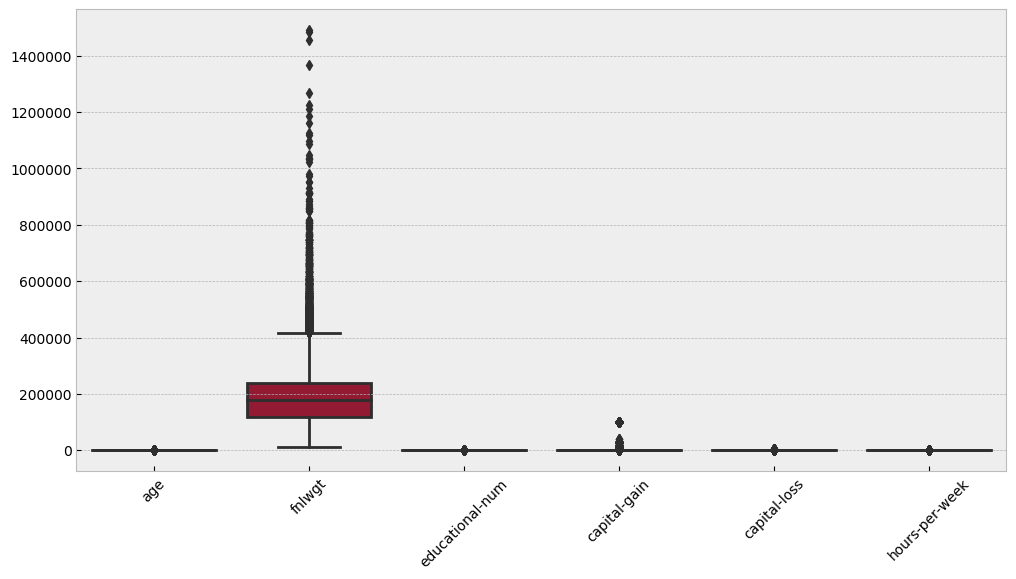

In [67]:
plt.subplots(figsize=(12, 6))
ax = sns.boxplot(data=adult_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

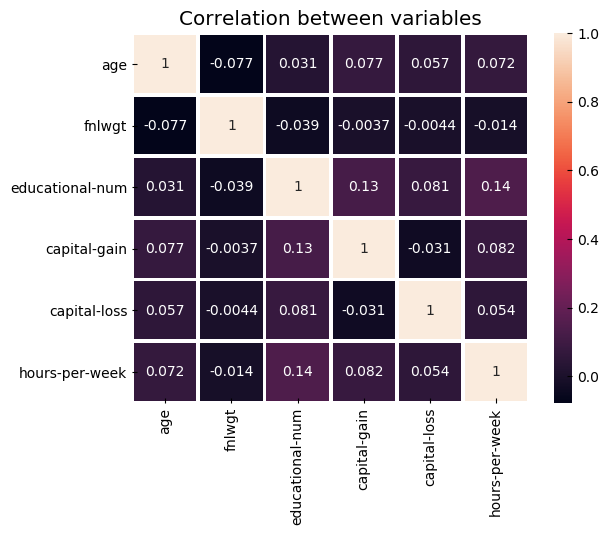

In [68]:
#Correlation Matrix

sns.heatmap(adult_df.corr(), annot=True, linewidth=2)
plt.title("Correlation between variables")
plt.show();

In [69]:
adult_df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [70]:
adult_df.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


In [71]:
adult_df.dtypes.index

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

# Numerical variable analysis


In [72]:
adult_df.dtypes.values

array([dtype('int64'), dtype('O'), dtype('int64'), dtype('O'),
       dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('O'), dtype('O')], dtype=object)

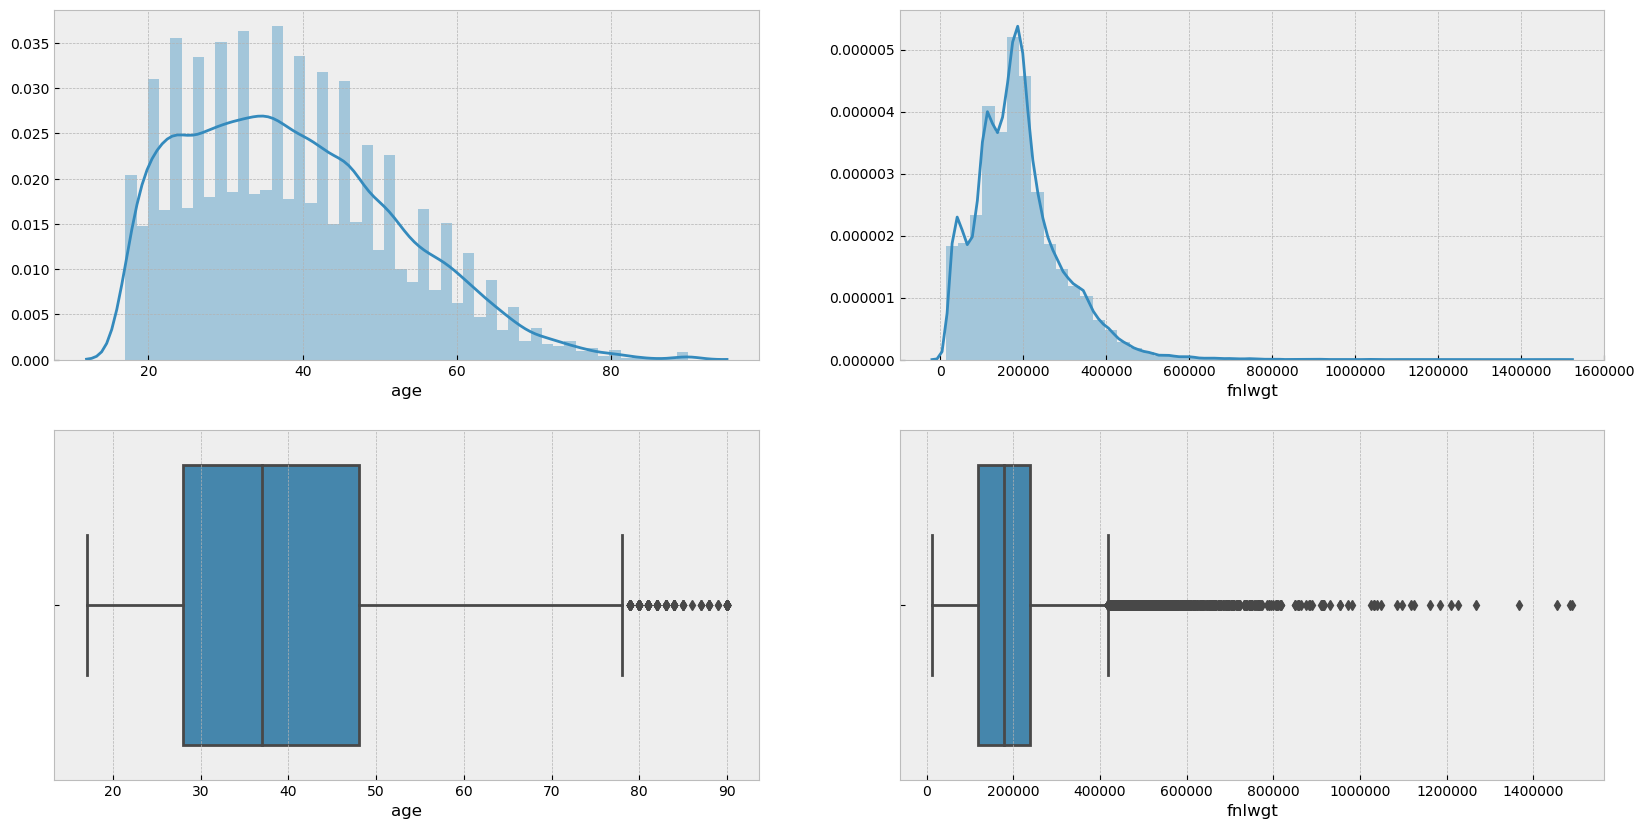

In [73]:
plt.figure(figsize=(20,10))

plt.subplot(221)
sns.distplot(adult_df.age)

plt.subplot(222)
sns.distplot(adult_df.fnlwgt)

plt.subplot(223)
sns.boxplot(adult_df.age)

plt.subplot(224)
sns.boxplot(adult_df.fnlwgt)


plt.show();

In [74]:
adult_df['fnlwgt'].fillna(adult_df.fnlwgt.mean(),inplace = True)

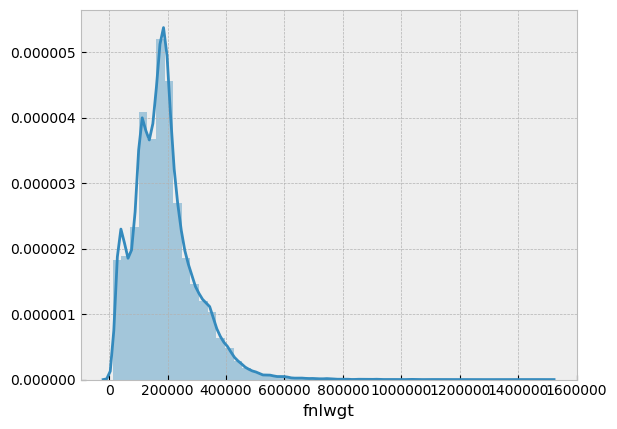

In [75]:
# Check the Loan amount distribution after filling the missing values

plt.figure(dpi = 100)
sns.distplot(adult_df.fnlwgt);

# Categorical variable analysis

In [76]:
adult_df.dtypes.values

array([dtype('int64'), dtype('O'), dtype('int64'), dtype('O'),
       dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('O'), dtype('O')], dtype=object)

In [77]:
adult_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [78]:
#Data normalization on numerical columns

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  

# Fitting only on training data. We then use the same mean and variance to normalize the test data.
scaler.fit(adult_df.select_dtypes("int64"))  
train_data = scaler.transform(adult_df.select_dtypes("int64"))  
train_data=pd.DataFrame(train_data)
train_data.columns = [
    "Age", "fnlwgt", "EducationNum",
    "CapitalGain", "CapitalLoss", "HoursPerWeek"]   #for ease of human interpretation

StandardScaler(copy=True, with_mean=True, with_std=True)

In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [80]:
adult_df['income'] = le.fit_transform(adult_df['income'])

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

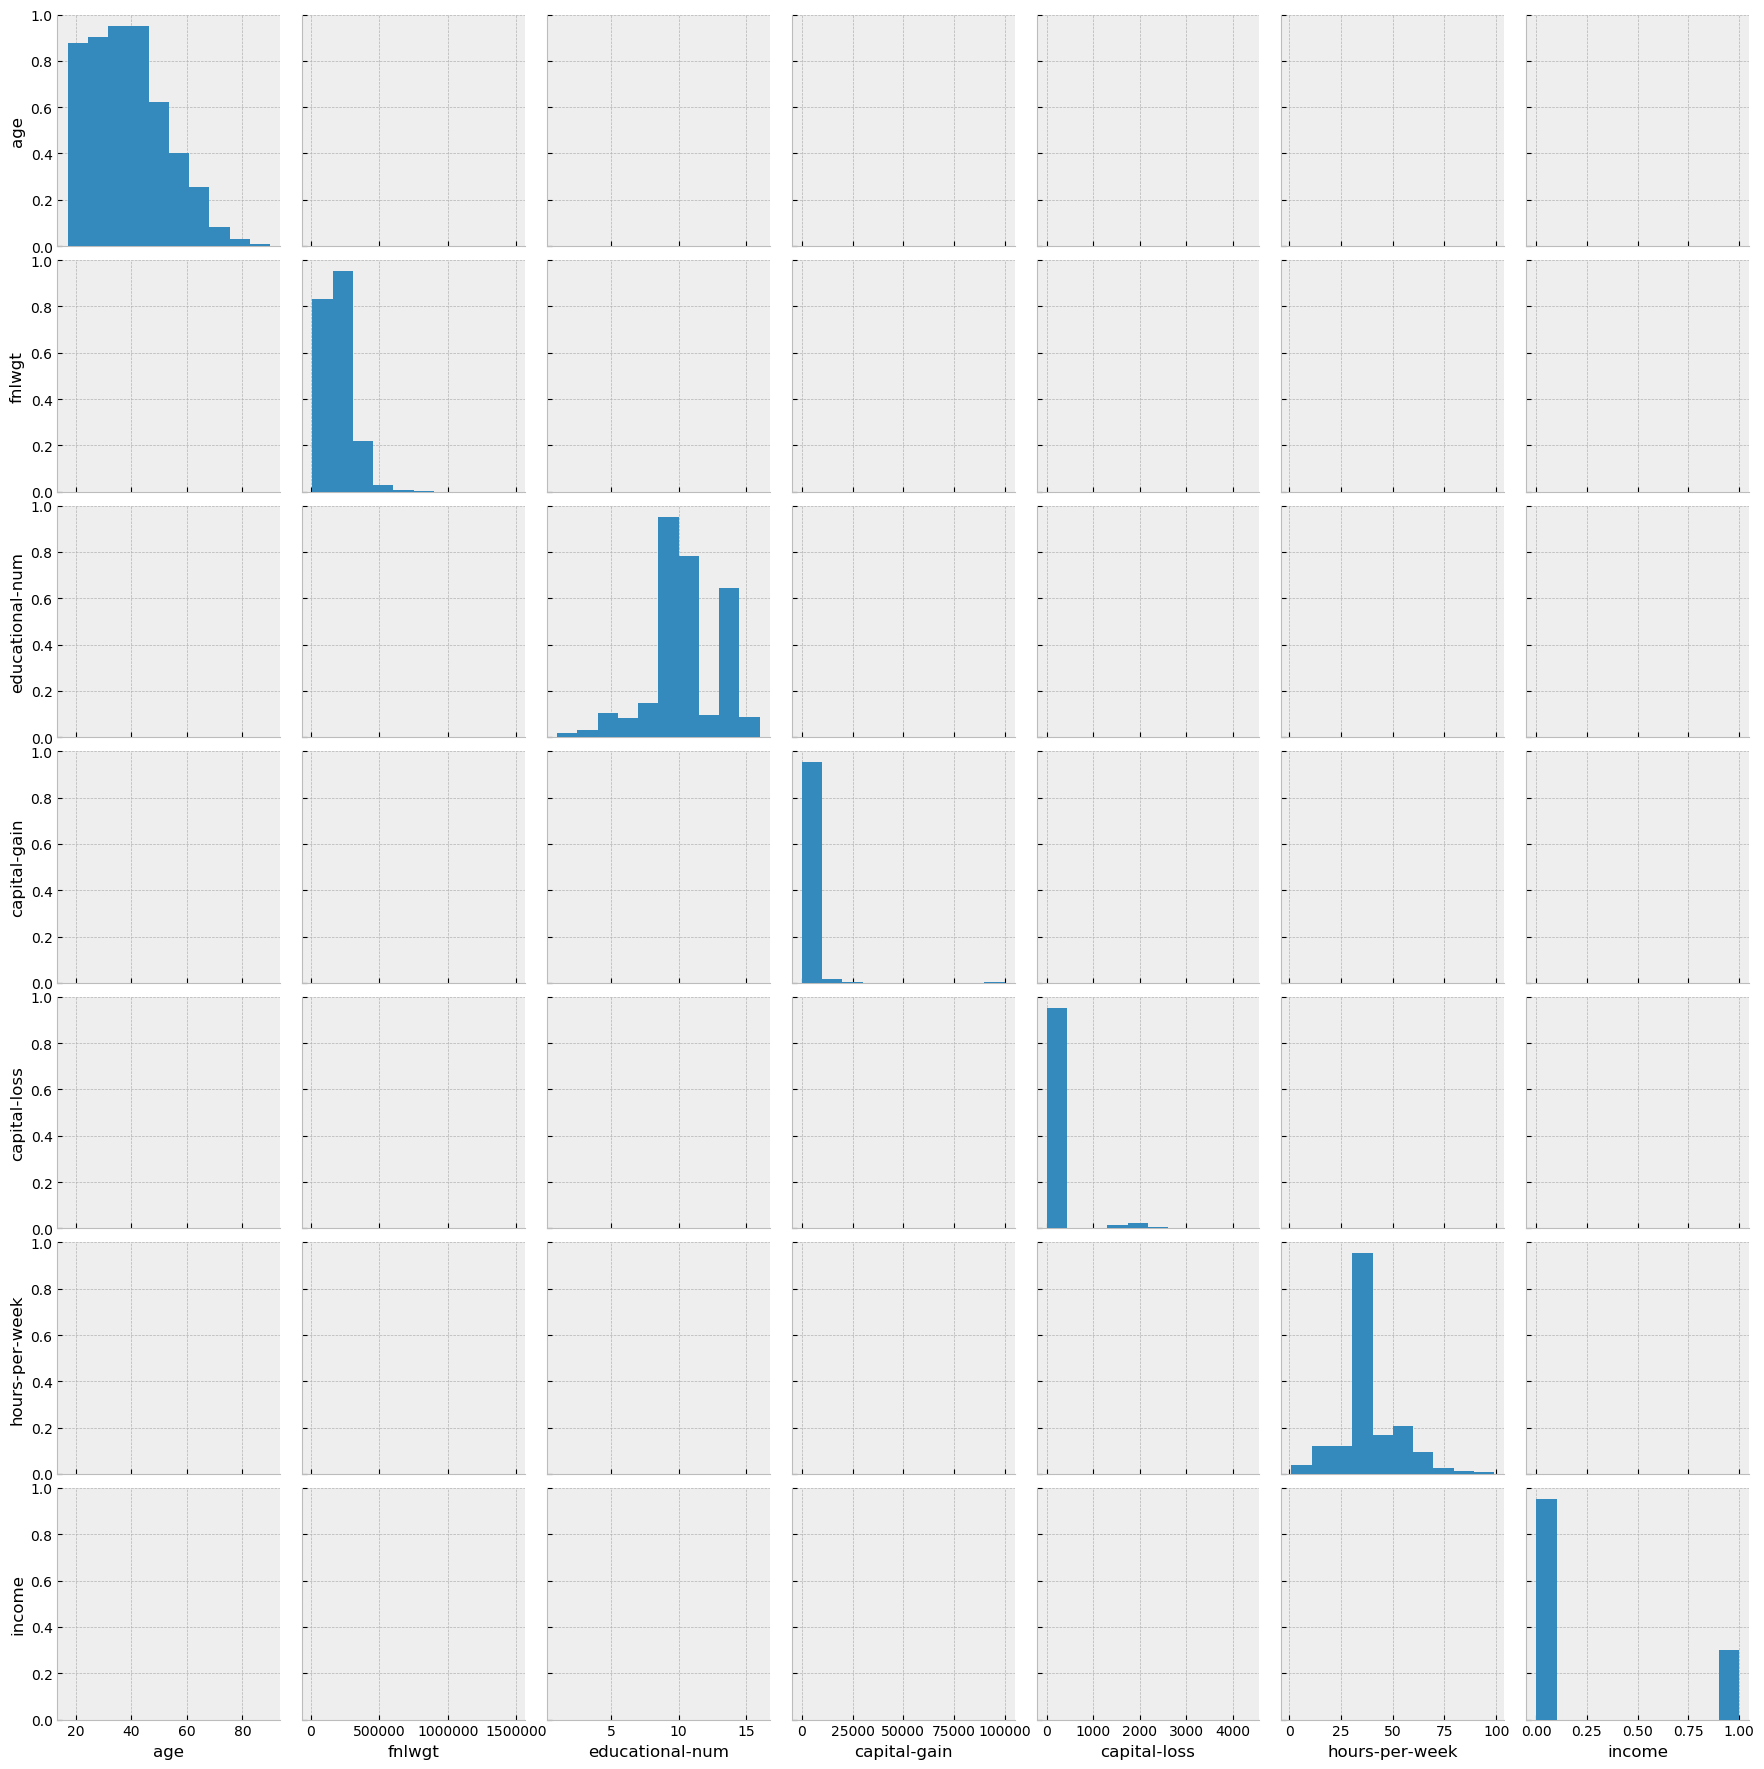

In [81]:
# Creating a pairplot of dataset
sns.pairplot(adult_df)
plt.show()

# Label Encoding

In [82]:
# Encode the Categorical columns

from sklearn.preprocessing import LabelEncoder

In [83]:
for col in adult_df.columns:
    if adult_df[col].dtypes == 'object':
        encoder = LabelEncoder()
        adult_df[col] = encoder.fit_transform(adult_df[col])

In [84]:
adult_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0


# Feature Selection


In [85]:
x = adult_df.drop('income', axis=1) ##contain all  independent variable
y = adult_df['income']         #dependent variable

In [86]:
adult_df.shape

(48842, 15)

In [87]:
print(x)

       age  workclass  fnlwgt  education  educational-num  marital-status  \
0       25          4  226802          1                7               4   
1       38          4   89814         11                9               2   
2       28          2  336951          7               12               2   
3       44          4  160323         15               10               2   
4       18          0  103497         15               10               4   
...    ...        ...     ...        ...              ...             ...   
48837   27          4  257302          7               12               2   
48838   40          4  154374         11                9               2   
48839   58          4  151910         11                9               6   
48840   22          4  201490         11                9               4   
48841   52          5  287927         11                9               2   

       occupation  relationship  race  gender  capital-gain  capital-loss  

In [88]:
print(y)

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int32


### Spliting of data into train and test data

In [89]:
#split our dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    adult_df.drop(columns= 'income', axis = 1), 
    adult_df['income'], 
    test_size=0.2)

print(' x_train: ',X_train.shape, '\n',
      'y_train:',y_train.shape,'\n',
      'x_test:',X_test.shape,'\n',
      'y_test:',y_test.shape)

 x_train:  (39073, 14) 
 y_train: (39073,) 
 x_test: (9769, 14) 
 y_test: (9769,)


# Model Selection

In [97]:
# Model 1: Logistic Regression

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model=LogisticRegression(random_state=0)
model=model.fit(X_train,y_train)
pred=model.predict(X_test)
lr_probability =model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)

acc_lr=accuracy_score(y_test, y_pred)
recall_lr=recall_score(y_test, y_pred, zero_division = 1)
precision_lr=precision_score(y_test, y_pred, zero_division = 1)
f1score_lr=f1_score(y_test, y_pred, zero_division = 1)
AUC_LR=roc_auc_score(y_test, y_pred)
#print accuracy and Auc values of model
print("Accuracy_score of logistic  : ", accuracy_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_LR)

Accuracy_score of logistic  :  0.7890265124373017
ROC_AUC Score: 0.6191830126637224


In [98]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      8668
           1       0.29      0.62      0.40      1101

    accuracy                           0.79      9769
   macro avg       0.62      0.72      0.64      9769
weighted avg       0.87      0.79      0.82      9769



Text(0.5, 1.0, 'Logistic Regression ROC curve')

Text(0.5, 0, 'FPR (Precision)')

Text(0, 0.5, 'TPR (Recall)')

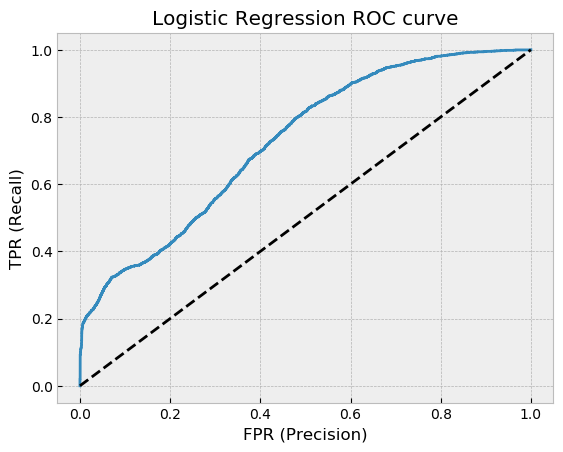

In [99]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, lr_probability)

plt.title('Logistic Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[7022  415]
 [1646  686]]


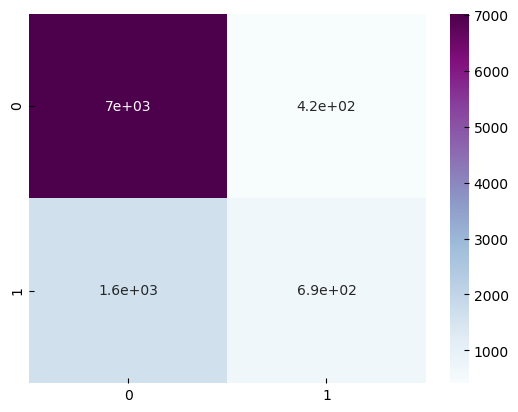

In [100]:
cm=confusion_matrix(y_test,pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

In [101]:
# Model 2: Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model=RandomForestClassifier(n_estimators = 100, random_state = 0)
model=model.fit(X_train,y_train)
pred=model.predict(X_test)
rf_probability =model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)

acc_rf=accuracy_score(y_test, y_pred)
recall_rf=recall_score(y_test, y_pred, zero_division = 1)
precision_rf=precision_score(y_test, y_pred, zero_division = 1)
f1score_rf=f1_score(y_test, y_pred, zero_division = 1)
AUC_RF=roc_auc_score(y_test, y_pred)
#print accuracy and Auc values of model
print("Accuracy_score of Random_forest: ", accuracy_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_RF)

Accuracy_score of Random_forest:  0.8637526870713481
ROC_AUC Score: 0.7839429250299427


In [102]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      7826
           1       0.63      0.76      0.69      1943

    accuracy                           0.86      9769
   macro avg       0.78      0.82      0.80      9769
weighted avg       0.88      0.86      0.87      9769



Text(0.5, 1.0, 'Logistic Regression ROC curve')

Text(0.5, 0, 'FPR (Precision)')

Text(0, 0.5, 'TPR (Recall)')

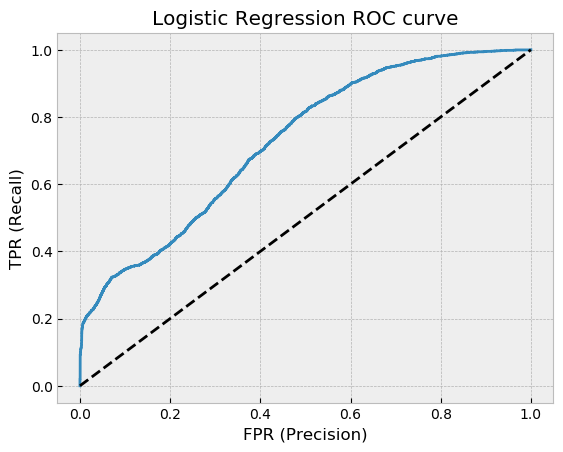

In [106]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, lr_probability)

plt.title('Logistic Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

In [108]:
# Model 4: SVC

from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model=svm.SVC(kernel='rbf', probability=True) 
model=model.fit(X_train,y_train)
pred=model.predict(X_test)
svc_probability =model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)

acc_svc=accuracy_score(y_test, y_pred)
recall_svc=recall_score(y_test, y_pred, zero_division = 1)
precision_svc=precision_score(y_test, y_pred, zero_division = 1)
f1score_svc=f1_score(y_test, y_pred, zero_division = 1)
AUC_SVC=roc_auc_score(y_test, y_pred)
#print accuracy and Auc values of model
print("Accuracy_score 0f SVC: ", accuracy_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_SVC)

Accuracy_score 0f SVC:  0.7981369638652882
ROC_AUC Score: 0.5798361467891178


In [109]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88      9373
           1       0.16      0.95      0.28       396

    accuracy                           0.80      9769
   macro avg       0.58      0.87      0.58      9769
weighted avg       0.96      0.80      0.86      9769



In [110]:
# Model 3: Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model=DecisionTreeClassifier(random_state=0)
model=model.fit(X_train,y_train)
pred=model.predict(X_test)
dt_probability =model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)

acc_dt=accuracy_score(y_test, y_pred)
recall_dt=recall_score(y_test, y_pred, zero_division = 1)
precision_dt=precision_score(y_test, y_pred, zero_division = 1)
f1score_dt=f1_score(y_test, y_pred, zero_division = 1)
AUC_DT=roc_auc_score(y_test, y_pred)
#print accuracy and Auc values of model
print("Accuracy_score of Dtree: ", accuracy_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_DT)

Accuracy_score of Dtree:  0.8170744190807657
ROC_AUC Score: 0.7516664567847333


In [111]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7392
           1       0.63      0.61      0.62      2377

    accuracy                           0.82      9769
   macro avg       0.75      0.75      0.75      9769
weighted avg       0.82      0.82      0.82      9769



In [112]:
# Model 5: KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model=KNeighborsClassifier(n_neighbors=2)
model=model.fit(X_train,y_train)
pred=model.predict(X_test)
knn_probability =model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)

acc_knn=accuracy_score(y_test, y_pred)
recall_knn=recall_score(y_test, y_pred, zero_division = 1)
precision_knn=precision_score(y_test, y_pred, zero_division = 1)
f1score_knn=f1_score(y_test, y_pred, zero_division = 1)
AUC_KNN=roc_auc_score(y_test, y_pred)
#print accuracy and Auc values of model
print("Accuracy_score of KNN: ", accuracy_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_KNN)

Accuracy_score of KNN:  0.7892312416828744
ROC_AUC Score: 0.6169626463205737


In [113]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.81      0.87      8702
           1       0.29      0.63      0.39      1067

    accuracy                           0.79      9769
   macro avg       0.62      0.72      0.63      9769
weighted avg       0.87      0.79      0.82      9769



In [114]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.81      0.87      8702
           1       0.29      0.63      0.39      1067

    accuracy                           0.79      9769
   macro avg       0.62      0.72      0.63      9769
weighted avg       0.87      0.79      0.82      9769



In [116]:
ind=['Logistic regression','Randomforest','Decisiontree','SVC','KNN']
data={"Accuracy":[acc_lr,acc_rf,acc_dt,acc_svc,acc_knn],
      "Recall":[recall_lr,recall_rf,recall_dt,recall_svc,recall_knn],
      "Precision":[precision_lr,precision_rf,precision_dt,precision_svc,precision_knn],
    'f1_score':[f1score_lr,f1score_rf,f1score_dt,f1score_svc,f1score_knn],
      "ROC_AUC":[AUC_LR,AUC_RF,AUC_DT,AUC_SVC,AUC_KNN]}
result=pd.DataFrame(data=data,index=ind)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.789027,0.294168,0.623070,0.399650,0.619183
Randomforest,0.863753,0.631218,0.757591,0.688655,0.783943
Decisiontree,0.817074,0.626501,0.614640,0.620514,0.751666
SVC,0.798137,0.162093,0.954545,0.277126,0.579836
KNN,0.789231,0.287307,0.627929,0.394234,0.616963


# Hyperparameter Tuning


In [120]:
from sklearn.model_selection import RandomizedSearchCV

In [121]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

In [122]:
param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

In [123]:
rf_tuned = RandomForestClassifier(random_state=42)

In [124]:
rf_cv = RandomizedSearchCV(
    estimator=rf_tuned, param_distributions=param_dist, cv=5, random_state=42)

In [125]:
rf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [126]:
rf_cv.best_score_

0.853914654553952

In [127]:
rf_cv.best_params_

{'n_estimators': 110, 'max_depth': 40}

In [128]:
rf_best = RandomForestClassifier(
    max_depth=102, n_estimators=40, random_state=42)

In [129]:
rf_best.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=102, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [130]:
Y_pred_rf_best = rf_best.predict(X_test)

In [131]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, Y_pred_rf_best) * 100, 2))
print('F1 score:', round(f1_score(y_test, Y_pred_rf_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 86.2
F1 score: 68.36


In [132]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred_rf_best)

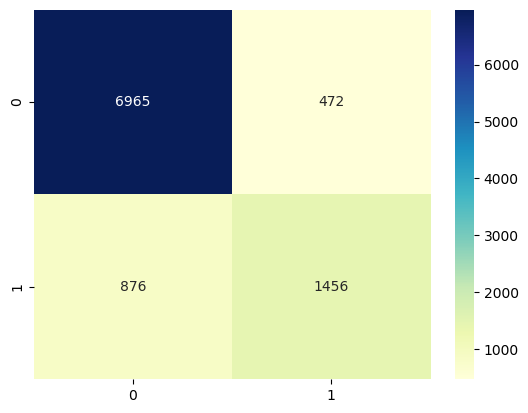

In [133]:
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [134]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred_rf_best))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7437
           1       0.76      0.62      0.68      2332

    accuracy                           0.86      9769
   macro avg       0.82      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769



Conclusion:
In this project, we build various models like logistic regression, knn classifier, support vector classifier, decision tree classifier, random forest classifier.

A hyperparameter tuned random forest classifier gives the highest accuracy score of 86 and f1score of 91.